(examples-complex-forms)=

# Complex shapes - Superposition

The [**superposition principle**](https://en.wikipedia.org/wiki/Superposition_principle) states that the net response caused by two or more stimuli is the sum of the responses caused by each stimulus individually. This principle holds in Magneto statics when there is no material response, and simply means that the total field created by multiple magnets and currents is the sum of the individual fields.

It is critical to understand that the superposition principle holds for the magnetization itself. When two magnets overlap geometrically, the magnetization in the overlap region is given by the vector sum of the two individual magnetizations.

(examples-union-operation)=

## Union operation

Based on the superposition principle we can build complex forms by aligning simple base shapes (no overlap), similar to a geometric union. This is demonstrated in the following example, where a hollow cylinder magnet is constructed from cuboids. The field is then compare to the exact solution implemented through `CylinderSegment`.

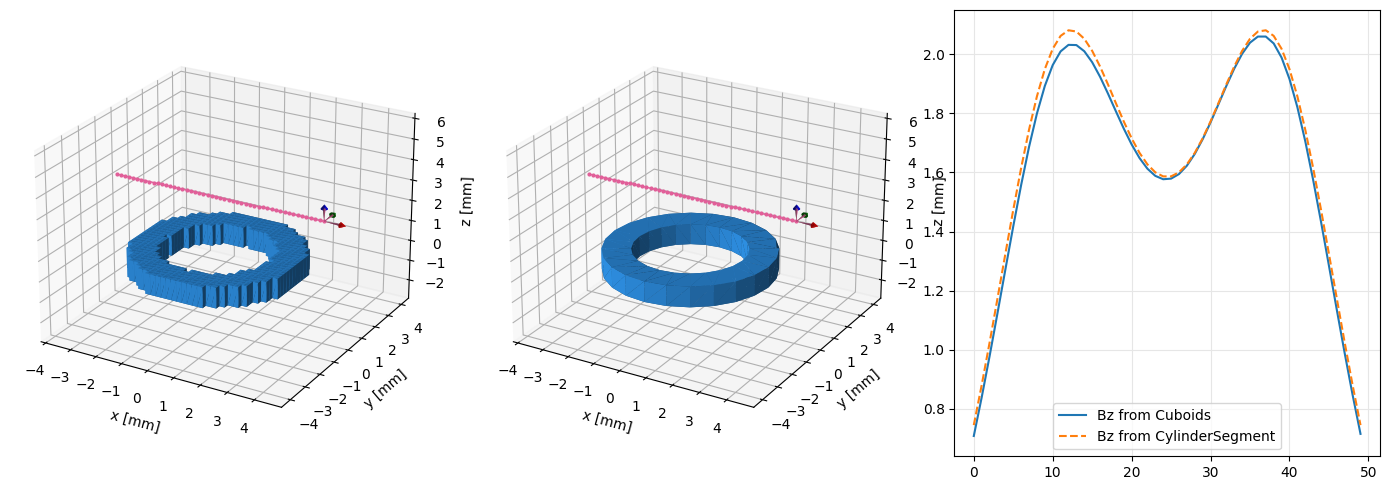

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import magpylib as magpy
from magpylib.magnet import Cuboid, CylinderSegment

fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(131, projection='3d', elev=24)
ax2 = fig.add_subplot(132, projection='3d', elev=24)
ax3 = fig.add_subplot(133)

sensor = magpy.Sensor(position=np.linspace((-4,0,3), (4,0,3), 50))

# ring with cuboid shapes
ts = np.linspace(-3, 3, 31)
grid = [(x,y,0) for x in ts for y in ts]

coll = magpy.Collection()
for pos in grid:
    r = np.sqrt(pos[0]**2 + pos[1]**2)
    if 2<r<3:
        coll.add(Cuboid(magnetization=(0,0,100), dimension=(.2,.2,1), position=pos))
magpy.show(coll, sensor, canvas=ax1, style_magnetization_show=False)

# ring with CylinderSegment
ring = CylinderSegment(magnetization=(0,0,100), dimension=(2,3,1,0,360))
magpy.show(ring, sensor, canvas=ax2, style_magnetization_show=False)

# compare field at sensor
ax3.plot(sensor.getB(coll).T[2], label='Bz from Cuboids')
ax3.plot(sensor.getB(ring).T[2], ls='--', label='Bz from CylinderSegment')
ax3.grid(color='.9')
ax3.legend()

plt.tight_layout()
plt.show()

Construction of complex forms from base shapes is a powerful tool, however, there is always a geometry approximation error, visible in the above figure. The error can be reduced by increasing the discretization finesse, but this also requires additional computation effort.

## Cut-out operation

When two objects with opposing magnetization vectors of similar amplitude overlap, they will just cancel in the overlap region. This enables geometric cut-out operations. In the following example we construct an exact hollow cylinder solution from two concentric cylinder shapes with opposite magnetizations, and compare the result to the `CylinderSegment` class solution.

In [2]:
from magpylib.magnet import Cylinder, CylinderSegment

# ring from CylinderSegment
ring0 = CylinderSegment(magnetization=(0,0,100), dimension=(2,3,1,0,360))

# ring with cut-out
inner = Cylinder(magnetization=(0,0,-100), dimension=(4,1))
outer = Cylinder(magnetization=(0,0, 100), dimension=(6,1))
ring1 = inner + outer

print('getB from Cylindersegment', ring0.getB((1,2,3)))
print('getB from Cylinder cut-out', ring1.getB((1,2,3)))

getB from Cylindersegment [0.36062145 0.72124291 2.05573729]
getB from Cylinder cut-out [0.36062145 0.72124291 2.05573729]


Note that, it is faster to compute the `Cylinder` field two times than computing the complex `CylinderSegment` field one time. This is why Magpylib automatically falls back to the `Cylinder` solution whenever `CylinderSegment` is called with 360 deg section angles. Unfortunately, cut-out operations cannot be displayed graphically at the moment, but {ref}`examples-own-3d-models` offer a solution here.

Finally, it is explained in {ref}`examples-triangle`, how complex shapes are achieved based on triangular meshes.